# Keşifsel Veri Analizi (KVA)

Bu dosyada, temizlenmiş veri seti üzerinden kitap okuma alışkanlıklarına dair keşifsel veri analizi yapılacaktır.
Amaç, demografik değişkenler (yaş, cinsiyet, eğitim, gelir vb.) ile kitap okuma davranışları arasındaki ilişkileri anlamaktır.

# Exploratory Data Analysis (EDA)

In this file, an exploratory data analysis will be conducted on the cleaned dataset to examine book reading habits.
The aim is to understand the relationships between demographic variables (such as age, gender, education, income, etc.) and book reading behaviors.



In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("../data/cleaned_reading_data.csv")

df.head()

,age,sex,race,marital_status,education,employement,incomes,how_many_books_did_you_read_during_last_12months,read_any_printed_books_during_last_12months,read_any_audiobooks_during_last_12months,read_any_e_books_during_last_12months,"last_book_you_read,_you…",do_you_happen_to_read_any_daily_news_or_newspapers,do_you_happen_to_read_any_magazines_or_journals
0,66,Male,Refused,Divorced,College graduate,Retired,"$20,000 to under $30,000",97,Yes,No,Yes,Purchased the book,No,Yes
1,46,Male,Native American/American Indian,Married,High school graduate,Employed full-time,"Less than $10,000",97,Yes,Yes,Yes,Purchased the book,Yes,Yes
2,32,Male,Mixed race,Never been married,High school graduate,Employed full-time,"Less than $10,000",97,No,Yes,Yes,Borrowed the book from a friend or family member,Yes,Yes
3,27,Male,Mixed race,Married,High school graduate,Employed full-time,"$40,000 to under $50,000",97,Yes,No,Yes,Borrowed the book from a library,Yes,No
4,16,Female,Mixed race,Never been married,High school incomplete,Employed part-time,"$10,000 to under $20,000",97,Yes,Yes,No,Purchased the book,Yes,No


In [3]:
sex_labels = {
    "Male": "Erkek (Male)",
    "Female": "Kadın (Female)"
}

avg_books_by_sex = df.groupby("sex")["how_many_books_did_you_read_during_last_12months"].mean()

avg_books_by_sex.index = avg_books_by_sex.index.map(sex_labels)

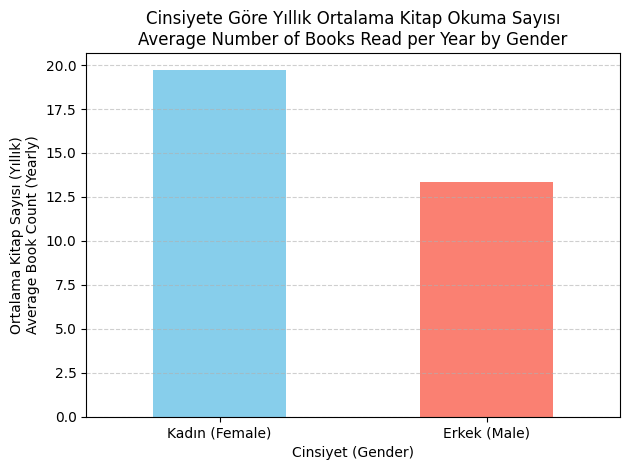

In [4]:
import matplotlib.pyplot as plt

avg_books_by_sex.plot(kind="bar", color=["skyblue", "salmon"])

plt.title("Cinsiyete Göre Yıllık Ortalama Kitap Okuma Sayısı\nAverage Number of Books Read per Year by Gender")
plt.ylabel("Ortalama Kitap Sayısı (Yıllık)\nAverage Book Count (Yearly)")
plt.xlabel("Cinsiyet (Gender)")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.savefig("../chart/average_books_by_gender.png", dpi=300)
plt.show()


Grafik, kadın katılımcıların son 12 ayda erkek katılımcılara kıyasla daha fazla kitap okuduğunu göstermektedir. Kadınların yıllık ortalama kitap okuma sayısı yaklaşık 20 iken, erkeklerde bu sayı 13 civarındadır.

The chart shows that female participants read more books than male participants in the past 12 months. While the average number of books read annually by women is approximately 20, this number is around 13 for men.

In [5]:
df['education'] = df['education'].replace({
    'Don’t know': 'Bilmiyor / Bilinmiyor',
    'Unknown': 'Bilmiyor / Bilinmiyor'
})

In [6]:
book_types = [
    'read_any_printed_books_during_last_12months',
    'read_any_e_books_during_last_12months',
    'read_any_audiobooks_during_last_12months'
]

book_type_prefs_cleaned = {}

for col in book_types:
    grouped = df.groupby('education')[col].value_counts(normalize=True).unstack().fillna(0)
    book_type_prefs_cleaned[col] = grouped["Yes"] * 100

book_type_df_cleaned = pd.DataFrame(book_type_prefs_cleaned)

In [7]:
edu_labels_merged = {
    'College graduate': 'Üniversite mezunu (College graduate)',
    'High school graduate': 'Lise mezunu (High school graduate)',
    'High school incomplete': 'Lise terk (High school incomplete)',
    'Post-graduate training/professional school after college': 'Yüksek lisans / Uzmanlık (Post-graduate)',
    'Some college, no 4-year degree': 'Üniversite okudu, mezun değil (Some college)',
    'Technical, trade or vocational school AFTER high school': 'Meslek/Teknik okul (Vocational school)',
    'Bilmiyor / Bilinmiyor': 'Bilmiyor / Bilinmiyor (Don’t know & Unknown)'
}

book_type_df_final = book_type_df_cleaned.rename(index=edu_labels_merged)

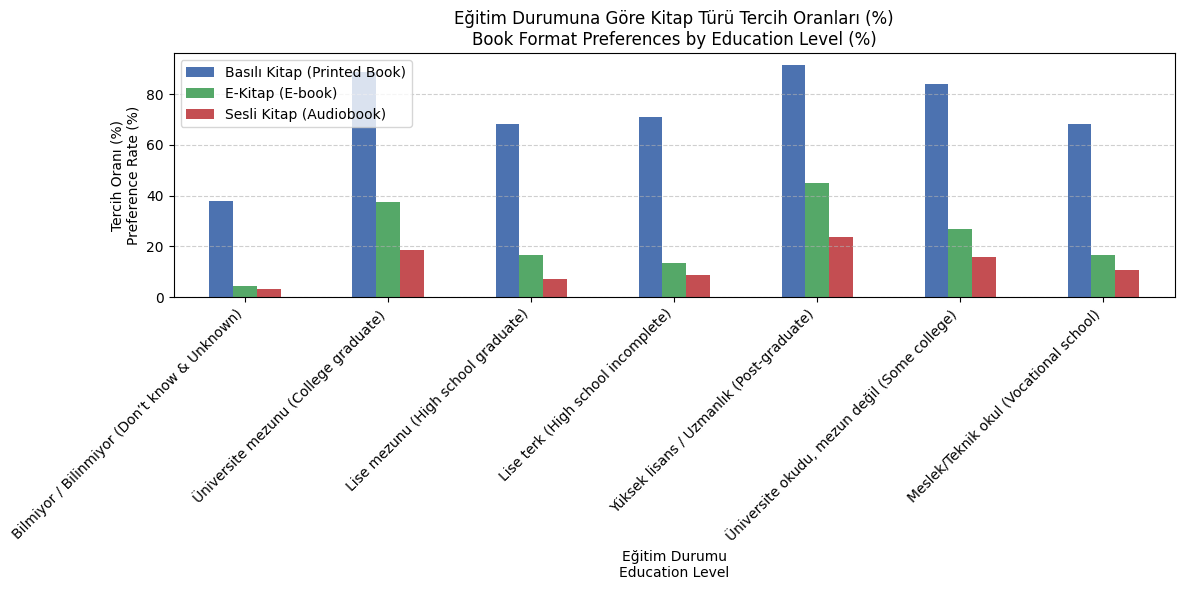

In [8]:
colors = ["#4C72B0", "#55A868", "#C44E52"]

book_type_df_final.plot(kind="bar", figsize=(12, 6), color=colors)

plt.title("Eğitim Durumuna Göre Kitap Türü Tercih Oranları (%)\nBook Format Preferences by Education Level (%)")
plt.ylabel("Tercih Oranı (%)\nPreference Rate (%)")
plt.xlabel("Eğitim Durumu\nEducation Level")
plt.xticks(rotation=45, ha="right")
plt.legend(["Basılı Kitap (Printed Book)", "E-Kitap (E-book)", "Sesli Kitap (Audiobook)"])
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.savefig("../chart/book_format_preferences_by_education.png", dpi=300)
plt.show()

Grafikte görüldüğü üzere, yüksek eğitim seviyesine sahip gruplar dijital kitap türlerini (e-kitap ve sesli kitap) daha fazla tercih etmektedir. 
Özellikle "Yüksek lisans / Uzmanlık" ve "Üniversite mezunu" gruplarında e-kitap kullanımı öne çıkmaktadır. 
Buna karşın, basılı kitaplar tüm eğitim gruplarında en yaygın tercih edilen türdür.

As seen in the chart, groups with higher education levels tend to prefer digital book formats (e-books and audiobooks) more frequently.
E-book usage is particularly prominent among the "Master's / Specialized" and "University graduate" groups.
However, printed books remain the most commonly preferred format across all education levels.

In [10]:
avg_books_by_income = df.groupby("incomes")["how_many_books_did_you_read_during_last_12months"].mean()

In [11]:
income_labels = {
    'Less than $10,000': '10.000$ altı (Less than $10,000)',
    '$10,000 to under $20,000': '10.000–20.000$ (10k–20k)',
    '$20,000 to under $30,000': '20.000–30.000$ (20k–30k)',
    '$30,000 to under $40,000': '30.000–40.000$ (30k–40k)',
    '$40,000 to under $50,000': '40.000–50.000$ (40k–50k)',
    '$50,000 to under $75,000': '50.000–75.000$ (50k–75k)',
    '$75,000 to under $100,000': '75.000–100.000$ (75k–100k)',
    '$100,000 or more': '100.000$ üzeri ($100k or more)',
    'Refused': 'Yanıtlamadı (Refused)'
}

avg_books_by_income.index = avg_books_by_income.index.map(income_labels)

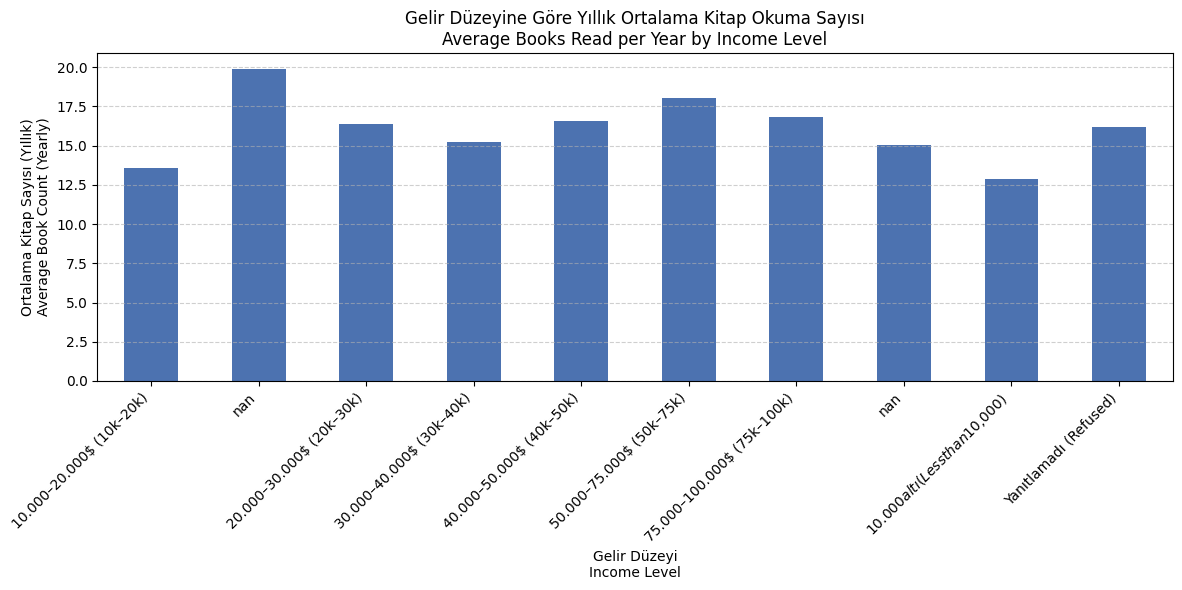

In [30]:
avg_books_by_income.plot(kind="bar", figsize=(12, 6), color="#4C72B0")

plt.title("Gelir Düzeyine Göre Yıllık Ortalama Kitap Okuma Sayısı\nAverage Books Read per Year by Income Level")
plt.ylabel("Ortalama Kitap Sayısı (Yıllık)\nAverage Book Count (Yearly)")
plt.xlabel("Gelir Düzeyi\nIncome Level")
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.savefig("../chart/average_books_by_income.png", dpi=300)
plt.show()

Gelir düzeyine göre yıllık ortalama kitap okuma sayısı incelendiğinde, en fazla kitap okuyan grup 20.000–30.000$ gelir aralığı olarak öne çıkmaktadır.
Genel olarak gelir arttıkça okuma oranı da hafif artış göstermektedir, ancak bu ilişki net bir doğrusal yapı sergilememektedir.

"Yanıtlamadı (Refused)" grubundaki katılımcılar gelir bilgisi vermemiştir, ancak kitap okuma verileri analizde yer almaktadır. Bu grup, yaklaşık 16 kitapla orta düzey bir okuma eğilimi göstermektedir.

When examining the average number of books read per year by income level, the group with an income range of $20,000–$30,000 stands out as the one that reads the most books.
In general, book reading tends to increase slightly as income rises; however, this relationship does not follow a clear linear pattern.

Participants in the "Refused" group did not disclose their income information, but their book reading data is included in the analysis. This group shows a moderate reading tendency, with an average of around 16 books per year.

In [12]:
df["age_group"] = pd.cut(df["age"], bins=[10, 20, 30, 40, 50, 60, 70, 100], labels=[
    "10-20", "21-30", "31-40", "41-50", "51-60", "61-70", "70+"
])

In [13]:
avg_books_by_age_group = df.groupby("age_group", observed=False)["how_many_books_did_you_read_during_last_12months"].mean()



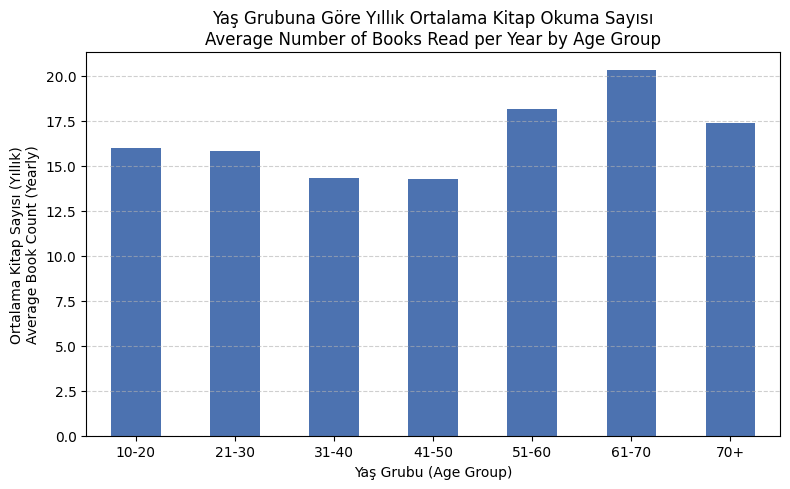

In [14]:
avg_books_by_age_group.plot(kind="bar", color="#4C72B0", figsize=(8, 5))

plt.title("Yaş Grubuna Göre Yıllık Ortalama Kitap Okuma Sayısı\nAverage Number of Books Read per Year by Age Group")
plt.xlabel("Yaş Grubu (Age Group)")
plt.ylabel("Ortalama Kitap Sayısı (Yıllık)\nAverage Book Count (Yearly)")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.savefig("../chart/average_books_by_age_group.png", dpi=300)
plt.show()


Grafik, farklı yaş gruplarının yıllık ortalama kitap okuma sayısını göstermektedir.

    - En fazla kitap okuyan grup: 61–70 yaş aralığındaki bireylerdir (yaklaşık 20 kitap/yıl).

    - En az okuyanlar: 31–50 yaş aralığındaki bireylerdir (yaklaşık 14 kitap/yıl).

    - Genç bireyler (10–30 yaş): Orta düzeyde kitap okuma ortalamasına sahiptir (~16 kitap).

    - 50 yaş üstü gruplarda genel olarak kitap okuma oranı daha yüksektir.

Bu durum, özellikle emeklilik yaşı yaklaşan bireylerin boş zamanlarını kitap okumaya daha fazla ayırdığını düşündürebilir. Buna karşın, 30’lu ve 40’lı yaşlarda iş, aile gibi sorumlulukların etkisiyle kitap okumaya ayrılan zaman azalıyor olabilir.


The chart shows the average number of books read annually across different age groups.

    - The highest number of books is read by individuals aged 61–70, with approximately 20 books per year.

    - The lowest reading rates are observed among individuals aged 31–50, with an average of around 14 books per year.

    - Younger individuals (ages 10–30) have a moderate reading average of about 16 books annually.

    - In general, book reading rates are higher among those aged 50 and above.

This pattern may suggest that individuals approaching retirement age have more free time to dedicate to reading. In contrast, those in their 30s and 40s may read less due to work, family, and other responsibilities that limit their available time.

In [15]:
book_format_cols = [
    "read_any_printed_books_during_last_12months",
    "read_any_e_books_during_last_12months",
    "read_any_audiobooks_during_last_12months"
]

book_type_by_age = df.groupby("age_group")[book_format_cols].apply(lambda x: (x == "Yes").mean() * 100)
book_type_by_age.columns = ["Basılı Kitap", "E-Kitap", "Sesli Kitap"]

C:\Users\Ensar\AppData\Local\Temp\ipykernel_5980\2945168821.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  book_type_by_age = df.groupby("age_group")[book_format_cols].apply(lambda x: (x == "Yes").mean() * 100)


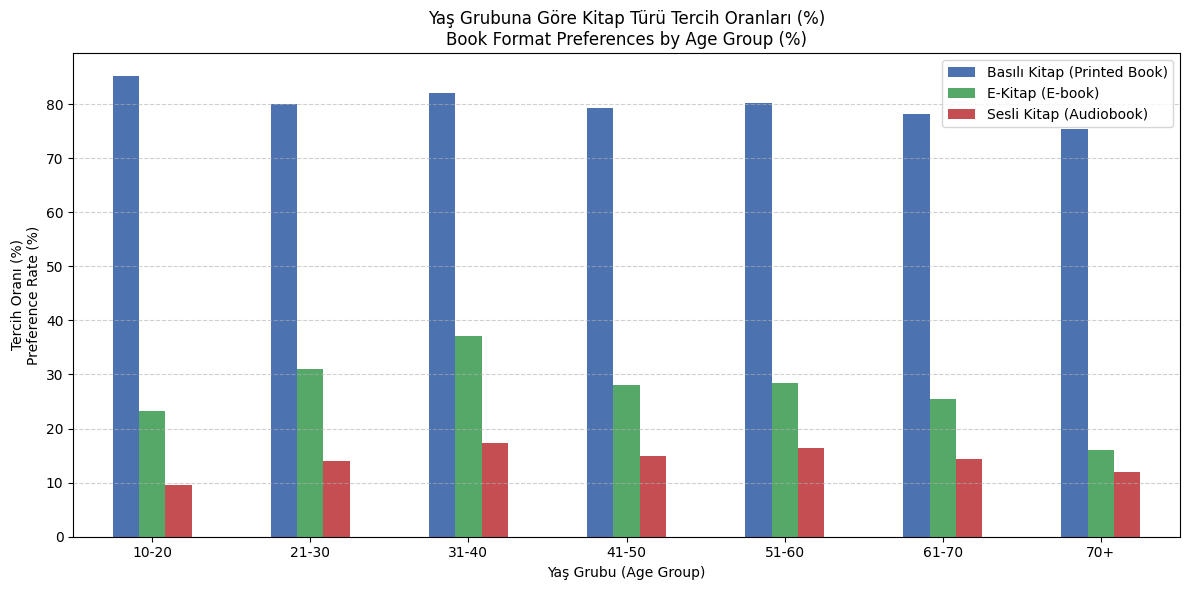

In [16]:
colors = ["#4C72B0", "#55A868", "#C44E52"]

book_type_by_age.plot(kind="bar", figsize=(12, 6), color=colors)

plt.title("Yaş Grubuna Göre Kitap Türü Tercih Oranları (%)\nBook Format Preferences by Age Group (%)")
plt.ylabel("Tercih Oranı (%)\nPreference Rate (%)")
plt.xlabel("Yaş Grubu (Age Group)")
plt.xticks(rotation=0)
plt.legend(["Basılı Kitap (Printed Book)", "E-Kitap (E-book)", "Sesli Kitap (Audiobook)"])
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Kaydet
plt.savefig("../chart/book_format_preferences_by_age_group.png", dpi=300)
plt.show()

Basılı kitap hâlâ tüm yaş gruplarında en baskın formattır.
E-kitap ve sesli kitap ise özellikle orta yaş gruplarında (özellikle 30’lu ve 40’lı yaşlar) daha yaygındır.
Teknolojiye yatkınlık arttıkça dijital tercihler yükselse de, basılı kitabın alışkanlık gücü halen çok yüksektir.

Printed books remain the most dominant format across all age groups.
E-books and audiobooks, on the other hand, are more commonly preferred among middle-aged groups (particularly those in their 30s and 40s).
While familiarity with technology increases the preference for digital formats, the enduring habit and appeal of printed books remains remarkably strong.

In [17]:
avg_books_by_marital_status = df.groupby("marital_status")["how_many_books_did_you_read_during_last_12months"].mean().sort_values(ascending=False)

label_map = {
    "Married": "Evli (Married)",
    "Divorced": "Boşanmış (Divorced)",
    "Widowed": "Dul (Widowed)",
    "Single": "Bekar (Single)",
    "Never been married": "Hiç evlenmemiş (Never married)",
    "Living with a partner": "Birlikte yaşayan (Living with partner)",
    "Separated": "Ayrı yaşayan (Separated)",
    "Don't know": "Bilmiyor (Don't know)"
}

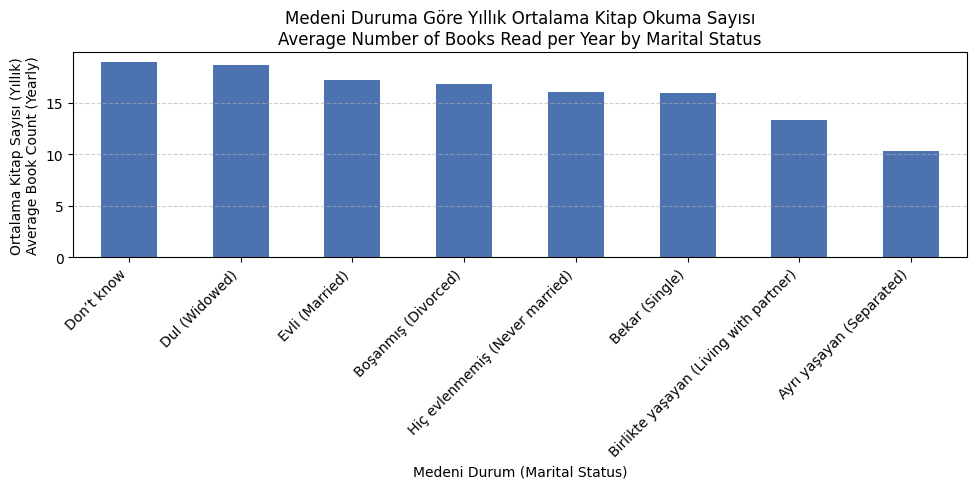

In [18]:
avg_books_by_marital_status = df.groupby("marital_status")["how_many_books_did_you_read_during_last_12months"] \
                                .mean() \
                                .sort_values(ascending=False)

plt.figure(figsize=(10, 5))
avg_books_by_marital_status.plot(kind="bar", color="#4C72B0")

plt.title("Medeni Duruma Göre Yıllık Ortalama Kitap Okuma Sayısı\nAverage Number of Books Read per Year by Marital Status")
plt.xlabel("Medeni Durum (Marital Status)")
plt.ylabel("Ortalama Kitap Sayısı (Yıllık)\nAverage Book Count (Yearly)")

translated_labels = [label_map.get(label, label) for label in avg_books_by_marital_status.index]
plt.xticks(ticks=range(len(translated_labels)), labels=translated_labels, rotation=45, ha="right")

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.savefig("../chart/average_books_by_marital_status_dual_lang.png", dpi=300)
plt.show()

Medeni durum, bireylerin okuma alışkanlıklarını etkileyebilen bir demografik faktördür.
Özellikle yalnız kalan veya bireysel yaşamı benimseyen gruplarda kitap okuma eğilimi daha yüksek gözlemlenmektedir.

Marital status is a demographic factor that can influence individuals' reading habits.
In particular, groups who live alone or adopt an individual lifestyle tend to exhibit higher levels of book reading.

In [19]:
df.rename(columns={"employement": "employment"}, inplace=True)

avg_books_by_employment = df.groupby("employment")["how_many_books_did_you_read_during_last_12months"] \
                             .mean() \
                             .sort_values(ascending=False)

In [20]:
label_map = {
    "Other": "Diğer (Other)",
    "Retired": "Emekli (Retired)",
    "Have own business/self-employed": "Kendi işi (Self-employed)",
    "Employed part-time": "Yarı zamanlı çalışan (Part-time)",
    "Student": "Öğrenci (Student)",
    "Not employed for pay": "Gelirsiz çalışmıyor (Unpaid)",
    "Employed full-time": "Tam zamanlı çalışan (Full-time)",
    "Disabled": "Engelli (Disabled)"
}

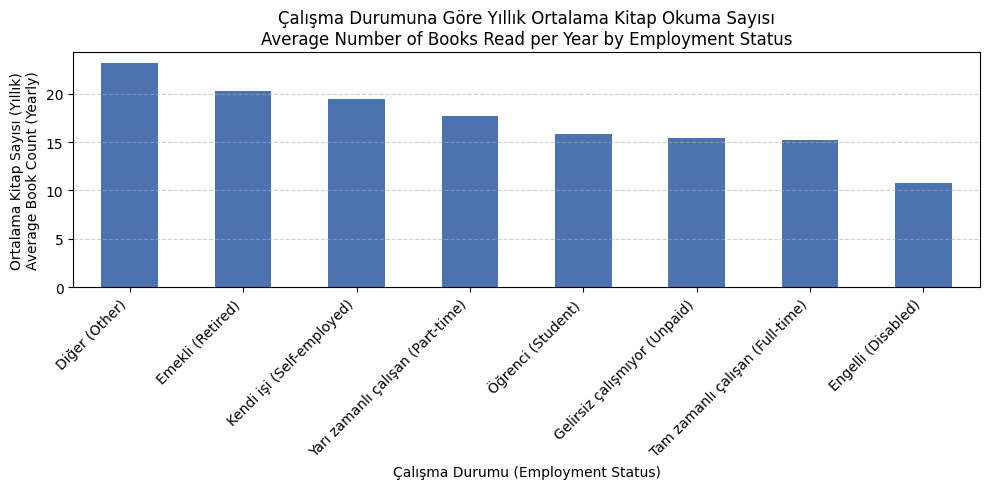

In [21]:
plt.figure(figsize=(10, 5))
avg_books_by_employment.plot(kind="bar", color="#4C72B0")

plt.title("Çalışma Durumuna Göre Yıllık Ortalama Kitap Okuma Sayısı\nAverage Number of Books Read per Year by Employment Status")
plt.xlabel("Çalışma Durumu (Employment Status)")
plt.ylabel("Ortalama Kitap Sayısı (Yıllık)\nAverage Book Count (Yearly)")

translated_labels = [label_map.get(label, label) for label in avg_books_by_employment.index]
plt.xticks(ticks=range(len(translated_labels)), labels=translated_labels, rotation=45, ha="right")

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.savefig("../chart/average_books_by_employment_status_dual_lang.png", dpi=300)
plt.show()

Çalışma durumu, kitap okuma alışkanlıklarında belirgin bir etkendir.
Daha fazla boş zamana sahip olan gruplar, (örneğin emekliler, part-time çalışanlar, “other”) daha yüksek kitap okuma ortalamasına sahiptir.
Tam zamanlı çalışanlar ve engelli bireyler ise çeşitli nedenlerle daha az kitap okumaktadır.

Employment status is a significant factor influencing book reading habits.
Groups with more free time—such as retirees, part-time workers, and those categorized as "other"—tend to have a higher average number of books read.
On the other hand, full-time workers and individuals with disabilities tend to read fewer books, likely due to various constraints.

In [25]:
non_readers = df[df["how_many_books_did_you_read_during_last_12months"] == 0]

In [31]:
non_readers_ratio = len(non_readers) / len(df) * 100
print(f"Kitap okumayanların oranı: %{non_readers_ratio:.2f}")

sex_dist = non_readers["sex"].value_counts(normalize=True).sort_values() * 100
age_dist = non_readers["age_group"].value_counts(normalize=True).sort_index() * 100
edu_dist = non_readers["education"].value_counts(normalize=True).sort_values() * 100
emp_dist = non_readers["employment"].value_counts(normalize=True).sort_values() * 100

Kitap okumayanların oranı: %13.77


C:\Users\Ensar\AppData\Local\Temp\ipykernel_5980\1979740372.py:43: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout(rect=[0, 0, 1, 0.94])


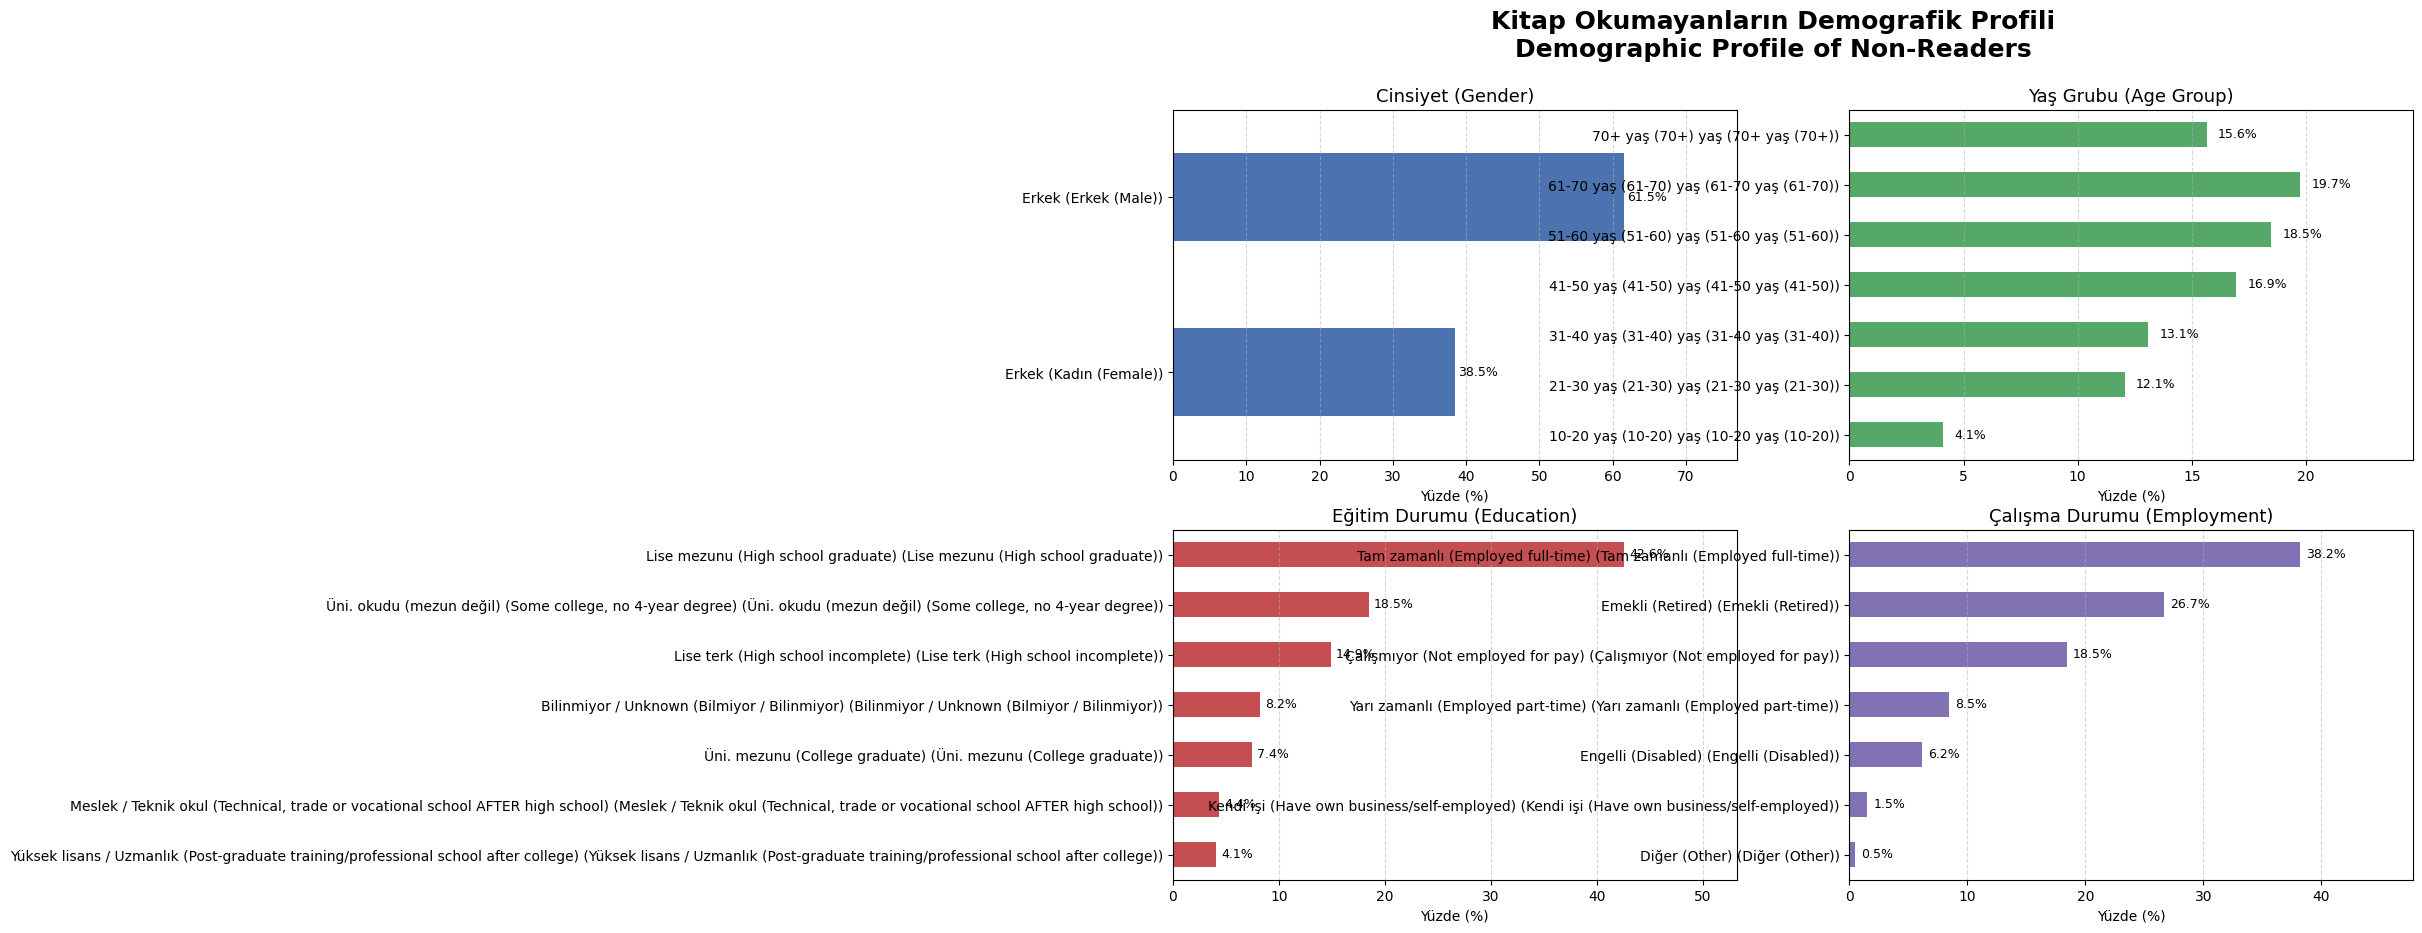

In [33]:
education_labels = {
    "High school graduate": "Lise mezunu",
    "Some college, no 4-year degree": "Üni. okudu (mezun değil)",
    "High school incomplete": "Lise terk",
    "College graduate": "Üni. mezunu",
    "Post-graduate training/professional school after college": "Yüksek lisans / Uzmanlık",
    "Technical, trade or vocational school AFTER high school": "Meslek / Teknik okul",
    "Bilmiyor / Bilinmiyor": "Bilinmiyor / Unknown"
}

employment_labels = {
    "Employed full-time": "Tam zamanlı",
    "Retired": "Emekli",
    "Not employed for pay": "Çalışmıyor",
    "Employed part-time": "Yarı zamanlı",
    "Disabled": "Engelli",
    "Have own business/self-employed": "Kendi işi",
    "Other": "Diğer"
}

sex_dist.index = [f"{'Kadın' if i == 'Female' else 'Erkek'} ({i})" for i in sex_dist.index]
age_dist.index = [f"{i} yaş ({i})" for i in age_dist.index]
edu_dist.index = [f"{education_labels.get(i, i)} ({i})" for i in edu_dist.index]
emp_dist.index = [f"{employment_labels.get(i, i)} ({i})" for i in emp_dist.index]

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle("Kitap Okumayanların Demografik Profili\nDemographic Profile of Non-Readers", fontsize=18, fontweight="bold")

def plot_bar(ax, data, title, color):
    bars = data.plot(kind="barh", ax=ax, color=color)
    ax.set_title(title, fontsize=13)
    ax.set_xlabel("Yüzde (%)")
    for i, v in enumerate(data.values):
        ax.text(v + 0.5, i, f"{v:.1f}%", va='center', fontsize=9)
    ax.grid(axis='x', linestyle='--', alpha=0.5)
    ax.set_xlim(0, max(data.values) * 1.25)

plot_bar(axes[0, 0], sex_dist, "Cinsiyet (Gender)", "#4C72B0")
plot_bar(axes[0, 1], age_dist, "Yaş Grubu (Age Group)", "#55A868")
plot_bar(axes[1, 0], edu_dist, "Eğitim Durumu (Education)", "#C44E52")
plot_bar(axes[1, 1], emp_dist, "Çalışma Durumu (Employment)", "#8172B3")

plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.savefig("../chart/non_readers_profile_final_cleaned.png", dpi=300)
plt.show()


Kitap okumayan bireyler genellikle daha düşük eğitim seviyesine sahip, yoğun çalışan ve orta yaş üzerindeki erkeklerden oluşmaktadır.

Non-readers tend to be predominantly men, middle-aged or older, working full-time, and with lower levels of education.

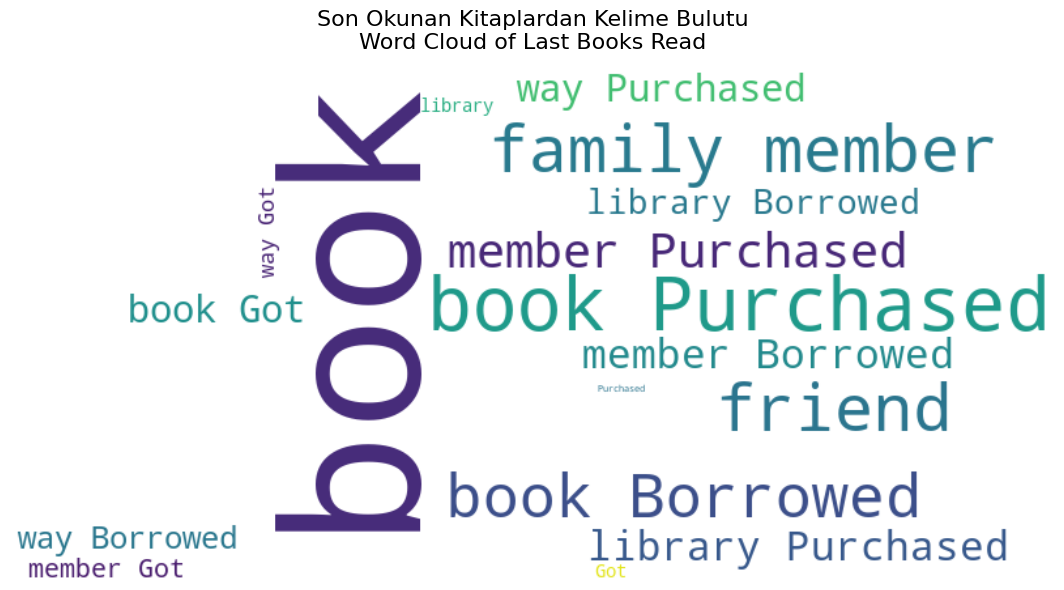

In [36]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Sütun adı (gözlemlediğimiz kadarıyla şu şekilde olabilir):
text_column = "last_book_you_read,_you…"

# Eksik verileri çıkar ve birleştir
text_data = df[text_column].dropna().astype(str).str.cat(sep=' ')

# Kelime bulutu oluştur
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(text_data)

# Görselleştir
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Son Okunan Kitaplardan Kelime Bulutu\nWord Cloud of Last Books Read", fontsize=16)
plt.tight_layout()
plt.savefig("../chart/last_books_wordcloud.png", dpi=300)
plt.show()


Katılımcıların en son okudukları kitaplara dair açıklamalardan oluşturulan kelime bulutu, kitaplara erişim yolları hakkında önemli ipuçları sunmaktadır. Analizde en sık geçen kelimeler arasında "book", "Purchased" (satın alındı), "Borrowed" (ödünç alındı) ve "library" (kütüphane) gibi ifadeler öne çıkmaktadır.

Bu bulgular, bireylerin kitaplara büyük oranda satın alma ve kütüphane/ödünç alma yöntemleriyle ulaştığını göstermektedir. Ayrıca "friend" ve "family member" gibi kelimelerin sıklığı, kitap paylaşımının sosyal çevre aracılığıyla da yaygın olduğunu ortaya koymaktadır.

Sonuç olarak, veriler kitap okuma alışkanlıklarında erişim biçimlerinin (satın alma, ödünç alma, sosyal kaynaklar) belirleyici bir faktör olduğunu göstermektedir.


The word cloud generated from participants' descriptions of the last books they read provides valuable insights into how they access books.
Among the most frequently mentioned words are "book", "purchased", "borrowed", and "library".

These findings suggest that individuals primarily access books through purchasing or borrowing from libraries.
Additionally, the frequent appearance of words like "friend" and "family member" indicates that book sharing through social networks is also common.

In conclusion, the data highlights that methods of access—such as buying, borrowing, and social sources—are key factors influencing reading habits.